In [6]:
import os

from deta import Deta
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()

PROJECT_DETA_KEY = os.getenv("project_deta_key")

# init with the key
deta = Deta(PROJECT_DETA_KEY)

# This is how to create/connect a database
# db_income = deta.Base("finance_app_income")
db = deta.Base("finance_app")


In [2]:
res = db.fetch()
res.items

[{'bank': 'Nubank',
  'category': 'Casa',
  'created_at': '04-01-2023',
  'due_date': '04-01-2023',
  'key': '0ddiu9ncnvjn',
  'product': 'Janeiro',
  'sub_category': 'Condomínio',
  'total': 450,
  'type_buy': 'débito',
  'type_spent': 'Fixo'},
 {'bank': 'Nubank',
  'category': 'YouTube',
  'created_at': '01-01-2023',
  'due_date': '15-02-2023',
  'key': '0dho3l9auz7p',
  'product': 'Canva 2/6',
  'sub_category': 'Assinatura-Canva',
  'total': 24.25,
  'type_buy': 'crédito',
  'type_spent': 'Fixo'},
 {'bank': 'Nubank',
  'category': 'Pessoal',
  'created_at': '09-01-2023',
  'due_date': '15-02-2023',
  'key': '0gnf20vg241s',
  'product': 'protetor solar ',
  'sub_category': 'Saúde',
  'total': 66.99,
  'type_buy': 'crédito',
  'type_spent': 'Variável'},
 {'bank': 'Ticket',
  'category': 'Alimentação',
  'created_at': '11-01-2023',
  'due_date': '11-01-2023',
  'key': '1fdb8h4t9j1m',
  'product': 'Mercadin',
  'sub_category': 'Mercado',
  'total': 50.96,
  'type_buy': 'débito',
  'type

In [3]:
import pandas as pd

data = pd.DataFrame(res.items)
data

,bank,category,created_at,due_date,key,product,sub_category,total,type_buy,type_spent
0,Nubank,Casa,04-01-2023,04-01-2023,0ddiu9ncnvjn,Janeiro,Condomínio,450.00,débito,Fixo
1,Nubank,YouTube,01-01-2023,15-02-2023,0dho3l9auz7p,Canva 2/6,Assinatura-Canva,24.25,crédito,Fixo
2,Nubank,Pessoal,09-01-2023,15-02-2023,0gnf20vg241s,protetor solar,Saúde,66.99,crédito,Variável
3,Ticket,Alimentação,11-01-2023,11-01-2023,1fdb8h4t9j1m,Mercadin,Mercado,50.96,débito,Variável
4,Nubank,Saúde,01-01-2023,15-05-2023,2dctk37fn2cj,Tiari - Academia 5/7,Academia,111.36,crédito,Fixo
...,...,...,...,...,...,...,...,...,...,...
90,Flash,Alimentação,01-01-2023,01-01-2023,wvk4xr7cx4di,sorvete,Lazer,36.00,débito,Variável
91,Nubank,Saúde,05-01-2023,15-01-2023,xau9ocpdly1m,Academia na Elite 1/6,Academia,130.00,crédito,Fixo
92,Ticket,Alimentação,13-01-2023,13-01-2023,ycm831i35no7,empadão,Mercado,41.00,débito,Variável
93,Nubank,Pessoal,31-12-2022,19-01-2023,yeaiqo0gqdee,Tenis,Vestuário,79.99,crédito,Variável


In [4]:
data["due_month"] = data["due_date"].map(lambda x: int(x.split("-")[1]))
data["due_year"] = data["due_date"].map(lambda x: int(x.split("-")[-1]))
data

,bank,category,created_at,due_date,key,product,sub_category,total,type_buy,type_spent,due_month,due_year
0,Nubank,Casa,04-01-2023,04-01-2023,0ddiu9ncnvjn,Janeiro,Condomínio,450.00,débito,Fixo,1,2023
1,Nubank,YouTube,01-01-2023,15-02-2023,0dho3l9auz7p,Canva 2/6,Assinatura-Canva,24.25,crédito,Fixo,2,2023
2,Nubank,Pessoal,09-01-2023,15-02-2023,0gnf20vg241s,protetor solar,Saúde,66.99,crédito,Variável,2,2023
3,Ticket,Alimentação,11-01-2023,11-01-2023,1fdb8h4t9j1m,Mercadin,Mercado,50.96,débito,Variável,1,2023
4,Nubank,Saúde,01-01-2023,15-05-2023,2dctk37fn2cj,Tiari - Academia 5/7,Academia,111.36,crédito,Fixo,5,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
90,Flash,Alimentação,01-01-2023,01-01-2023,wvk4xr7cx4di,sorvete,Lazer,36.00,débito,Variável,1,2023
91,Nubank,Saúde,05-01-2023,15-01-2023,xau9ocpdly1m,Academia na Elite 1/6,Academia,130.00,crédito,Fixo,1,2023
92,Ticket,Alimentação,13-01-2023,13-01-2023,ycm831i35no7,empadão,Mercado,41.00,débito,Variável,1,2023
93,Nubank,Pessoal,31-12-2022,19-01-2023,yeaiqo0gqdee,Tenis,Vestuário,79.99,crédito,Variável,1,2023


## Gastos por categoria

In [5]:
data[data["category"] == "Educação"]
data.groupby(["category"])["total"].sum().reset_index()

,category,total
0,Alimentação,1122.71
1,Assinaturas,82.60
2,Casa,2418.26
3,Celular,45.00
4,Dog,378.10
5,Educação,58.68
6,Lazer,739.40
7,Outros,248.13
8,Pessoal,520.06
9,Saúde,1806.43


## Gastos por cartão de crédito

In [11]:
data[(data["type_buy"] == "crédito") & (data["bank"] == "Nubank")]["total"].sum()

4355.45

In [18]:
data_type_buy = data[
    # (data["type_buy"] == "crédito")
    # (data["bank"] == "Nubank")
    (data["due_year"] == 2023)
    & (data["due_month"] == 1)
].groupby("type_buy")["total"].agg(sum).reset_index()


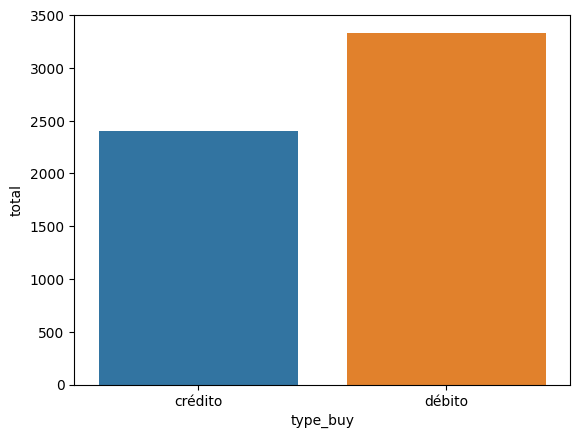

In [20]:
_ = sns.barplot(data=data_type_buy, x="type_buy", y="total")
plt.show()

## Gastos por Subcategorias

In [22]:
data[data["category"] == "Educação"]
data.groupby(["category", "sub_category"])["total"].sum().reset_index()

,category,sub_category,total
0,Alimentação,Lazer,569.57
1,Alimentação,Mercado,553.14
2,Assinaturas,Disney+,27.90
3,Assinaturas,Prime,29.80
4,Assinaturas,Spotify,24.90
5,Casa,Aluguel,1397.86
6,Casa,Condomínio,450.00
7,Casa,Detalhes,12.21
8,Casa,IPTU,261.37
9,Casa,Internet,108.32
